In [1]:
# import the necessary packages
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import sklearn
from skimage import exposure
import numpy as np
import imutils
import cv2
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import BisectingKMeans
import matplotlib.pyplot as plt
import time

In [2]:
# Load the MNIST dataset
mnist = fetch_openml(name='mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Get the data and target labels
data_temp, labels = mnist.data, mnist.target

data_temp['labels'] = labels
print('labels', data_temp['labels'].shape)
print('data_temp ', data_temp.shape)

filtered_data = data_temp.drop('labels', axis=1)
filtered_labels = data_temp['labels']


labels (70000,)
data_temp  (70000, 785)


In [4]:
# Check the labels
filtered_labels.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: labels, dtype: int64

In [5]:
# Function to apply K-NN algorithm

def apply_knn(filtered_data, filtered_labels):
    # Function to apply K-NN algorithm

    print('Total data points ', len(filtered_data))

    # take the MNIST data and construct the training and testing split, using 75% of the
    # data for training and 25% for testing
    (trainData, testData, trainLabels, testLabels) = train_test_split(filtered_data,
        filtered_labels, test_size=0.25, random_state=42)

    # take 10% of the training data and use that for validation
    (trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
        test_size=0.1, random_state=84)

    # show the sizes of each data split
    print("training data points: {}".format(len(trainLabels)))
    print("validation data points: {}".format(len(valLabels)))
    print("testing data points: {}".format(len(testLabels)))

    print(' ')

    print(trainData.shape, trainLabels.shape)
    print(' ')

    # initialize the values of k for our k-Nearest Neighbor classifier along with the
    # list of accuracies for each value of k
    kVals = range(1, 2, 1)
    accuracies = []

    # loop over various values of `k` for the k-Nearest Neighbor classifier
    for k in range(1, 2, 1):
        # Record the start time
        start_time = time.time()
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(trainData, trainLabels)

        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)
        # Record the end time
        end_time = time.time()
        elapsed_time = round(end_time - start_time, 2)
        if k == 1:
            print('Total time elapsed for complete dataset ', str(k)+'-NN is: ', elapsed_time, ' seconds')
            t = elapsed_time
            accuracy = score

    # find the value of k that has the largest accuracy
    i = int(np.argmax(accuracies))
    print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
        accuracies[i] * 100))

    print(' ')
    # re-train our classifier using the best k value and predict the labels of the
    # test data
    model = KNeighborsClassifier(n_neighbors=kVals[i])
    model.fit(trainData, trainLabels)
    predictions = model.predict(testData)

    # show a final classification report demonstrating the accuracy of the classifier
    # for each of the digits
    print("EVALUATION ON TESTING DATA")
    print(classification_report(testLabels, predictions))

    return accuracy, time


In [6]:
# complete dataset k-NN

accuracy_complete, time_complete = apply_knn(filtered_data, filtered_labels)


Total data points  70000
training data points: 47250
validation data points: 5250
testing data points: 17500
 
(47250, 784) (47250,)
 
k=1, accuracy=96.93%
Total time elapsed for complete dataset  1-NN is:  13.8  seconds
k=1 achieved highest accuracy of 96.93% on validation data
 
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1714
           1       0.97      0.99      0.98      1977
           2       0.98      0.96      0.97      1761
           3       0.97      0.96      0.96      1806
           4       0.97      0.97      0.97      1587
           5       0.96      0.96      0.96      1607
           6       0.98      0.99      0.99      1761
           7       0.96      0.97      0.97      1878
           8       0.98      0.93      0.96      1657
           9       0.95      0.96      0.95      1752

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.

In [7]:
# Randomly sampled dataset k-NN
l_random = []
for M in (500, 1000, 5000, 10000, 15000):
    data_temp_cropped = data_temp.sample(frac=M/len(data_temp), random_state=42)

    filtered_data_cropped = data_temp_cropped.drop('labels', axis=1)
    filtered_labels_cropped = data_temp_cropped['labels']

    print('----------------------------------------------------------------')

    accuracy, time = apply_knn(filtered_data_cropped, filtered_labels_cropped)
    l_random.append([M, accuracy, time])

    print('----------------------------------------------------------------')


----------------------------------------------------------------
Total data points  500
training data points: 337
validation data points: 38
testing data points: 125
 
(337, 784) (337,)
 
k=1, accuracy=78.95%
Total time elapsed for complete dataset  1-NN is:  0.03  seconds
k=1 achieved highest accuracy of 78.95% on validation data
 
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.73      1.00      0.85        11
           2       1.00      0.80      0.89        10
           3       0.71      0.94      0.81        16
           4       1.00      0.73      0.84        11
           5       0.75      0.67      0.71         9
           6       0.86      0.92      0.89        13
           7       0.93      0.88      0.90        16
           8       1.00      0.61      0.76        18
           9       0.77      1.00      0.87        10

    accuracy                           0.8

In [8]:
# Preparing data for BisectingKMeans clustering

# Scale pixel values to the range [0, 1]
data = filtered_data / 255.0
print(type(data), data.shape)

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

<class 'pandas.core.frame.DataFrame'> (70000, 784)


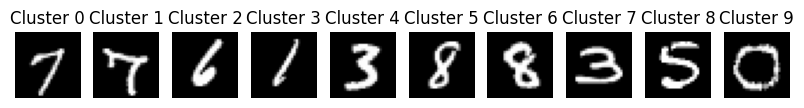

In [19]:
# Apply BisectingKMeans clustering

n_clusters = 10
bkm = BisectingKMeans(n_clusters=n_clusters, init='k-means++')
cluster_labels = bkm.fit_predict(data_std)

# Get distances of each row from the corresponding cluster centroid
distances_to_centroids = np.min(bkm.transform(data_std), axis=1)

# Add cluster labels to the final output data
final_output_data = np.column_stack((data, cluster_labels))

# Visualize a sample image from each cluster
fig, axs = plt.subplots(1, n_clusters, figsize=(10, 3))

for cluster_num in range(n_clusters):
    cluster_samples = final_output_data[final_output_data[:, -1] == cluster_num]
    sample_index = np.random.randint(0, cluster_samples.shape[0])
    sample_image = cluster_samples[sample_index, :-1].reshape(28, 28)
    axs[cluster_num].imshow(sample_image, cmap='gray')
    axs[cluster_num].axis('off')
    axs[cluster_num].set_title(f'Cluster {cluster_num}')

plt.show()

In [20]:
print(type(distances_to_centroids[0]))
print(distances_to_centroids.shape)


<class 'numpy.float64'>
(70000,)


In [21]:
# Creating the clustered datase
a = np.column_stack((filtered_data, filtered_labels))
b = np.column_stack((a, distances_to_centroids))
full_output = pd.DataFrame(np.column_stack((b, cluster_labels)))

In [22]:
full_output.head()

,0,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,784,785,786
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,29.409451,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15.849677,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,47.256944,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13.479031,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,19.334755,1


In [23]:
full_output.shape

(70000, 787)

In [24]:
full_output.rename(columns={784: 'digits', 785:'dist', 786:'cluster'}, inplace=True)
full_output.head()

,0,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,digits,dist,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,29.409451,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15.849677,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,47.256944,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13.479031,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,19.334755,1


In [25]:
full_output['dist'] = full_output['dist'].astype(float)
full_output.dtypes


0           object
1           object
2           object
3           object
4           object
            ...   
782         object
783         object
digits      object
dist       float64
cluster     object
Length: 787, dtype: object

In [26]:
def calculate_confidence_interval(mean, std_dev, num_experiments, confidence_level=0.95):
    # Calculate standard error of the mean (SEM)
    sem = std_dev / math.sqrt(num_experiments)

    # Calculate critical value based on the confidence level
    critical_value = stats.norm.ppf((1 + confidence_level) / 2)

    # Calculate confidence interval
    lower_bound = mean - critical_value * sem
    upper_bound = mean + critical_value * sem

    return lower_bound, upper_bound

In [27]:
# Sampling data from the clusters

# Create an empty DataFrame for the final result

l_bkm = []

for M in (500, 1000, 5000, 10000, 15000):

    # Create an empty DataFrame for the final result
    cropped_final = pd.DataFrame()

    # Get unique clusters from 'full_output'
    unique_clusters = full_output['cluster'].unique()

    # Iterate over each unique cluster
    for cluster in unique_clusters:
        # Filter 'full_output' for the current cluster
        cluster_data = full_output[full_output['cluster'] == cluster]

        # Calculate the top of rows based on minimum 'distance' values
        selected_rows = cluster_data.nsmallest(int(M/10), 'dist')

        # Append the selected rows to 'cropped_final'
        cropped_final = cropped_final.append(selected_rows)

    #print('data', int(M/10), len(cropped_final))

    # Reset the index of the final DataFrame
    cropped_final.reset_index(drop=True, inplace=True)

    # Display the result
    cropped_final.head()

    print('----------------------------------------------------------------')

    # Sampled dataset k-NN after Clutering taking the close values
    accuracy, time = apply_knn(cropped_final.iloc[:, :-3], cropped_final['digits'])
    l_bkm.append([M, accuracy, time])
    print('----------------------------------------------------------------')


<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed

----------------------------------------------------------------
Total data points  500
training data points: 337
validation data points: 38
testing data points: 125
 
(337, 784) (337,)
 
k=1, accuracy=92.11%
Total time elapsed for complete dataset  1-NN is:  0.06  seconds
k=1 achieved highest accuracy of 92.11% on validation data
 
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         2
           3       1.00      0.96      0.98        23
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        10
           6       0.96      1.00      0.98        27
           7       1.00      1.00      1.00         6
           8       0.93      1.00      0.97        14
           9       1.00      1.00      1.00        10

    accuracy                           0.9

<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed

----------------------------------------------------------------
Total data points  1000
training data points: 675
validation data points: 75
testing data points: 250
 
(675, 784) (675,)
 
k=1, accuracy=97.33%
Total time elapsed for complete dataset  1-NN is:  0.09  seconds
k=1 achieved highest accuracy of 97.33% on validation data
 
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00         7
           3       0.95      1.00      0.97        35
           4       1.00      0.80      0.89        10
           5       0.96      1.00      0.98        25
           6       0.97      1.00      0.99        36
           7       1.00      0.81      0.90        16
           8       1.00      0.94      0.97        34
           9       0.88      1.00      0.93        35

    accuracy                           0.

<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed

----------------------------------------------------------------
Total data points  5000
training data points: 3375
validation data points: 375
testing data points: 1250
 
(3375, 784) (3375,)
 
k=1, accuracy=96.80%
Total time elapsed for complete dataset  1-NN is:  0.39  seconds
k=1 achieved highest accuracy of 96.80% on validation data
 
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       187
           1       1.00      1.00      1.00       116
           2       0.98      0.98      0.98        52
           3       0.92      0.95      0.94       153
           4       0.94      0.92      0.93        52
           5       0.95      0.93      0.94       110
           6       0.99      1.00      0.99       215
           7       0.91      0.86      0.88        35
           8       0.96      0.96      0.96       165
           9       0.95      0.93      0.94       165

    accuracy                        

<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed

----------------------------------------------------------------
Total data points  10000
training data points: 6750
validation data points: 750
testing data points: 2500
 
(6750, 784) (6750,)
 
k=1, accuracy=97.73%
Total time elapsed for complete dataset  1-NN is:  0.82  seconds
k=1 achieved highest accuracy of 97.73% on validation data
 
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       379
           1       1.00      1.00      1.00       253
           2       0.99      0.96      0.98       167
           3       0.97      0.98      0.97       266
           4       0.97      0.94      0.95       153
           5       0.96      0.98      0.97       230
           6       0.98      0.99      0.99       343
           7       0.99      0.96      0.97        89
           8       0.98      0.97      0.97       316
           9       0.96      0.96      0.96       304

    accuracy                       

<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cropped_final = cropped_final.append(selected_rows)
<ipython-input-27-53bf9bfd8ddf>:24: FutureWarning: The frame.append method is deprecated and will be removed

----------------------------------------------------------------
Total data points  15000
training data points: 10125
validation data points: 1125
testing data points: 3750
 
(10125, 784) (10125,)
 
k=1, accuracy=97.60%
Total time elapsed for complete dataset  1-NN is:  1.45  seconds
k=1 achieved highest accuracy of 97.60% on validation data
 
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       575
           1       1.00      0.99      0.99       385
           2       0.98      0.98      0.98       235
           3       0.97      0.98      0.97       409
           4       0.94      0.92      0.93       274
           5       0.94      0.96      0.95       314
           6       0.97      0.99      0.98       526
           7       0.95      0.95      0.95       131
           8       0.99      0.96      0.98       450
           9       0.95      0.94      0.95       451

    accuracy                   

[500, 1000, 5000, 10000, 15000]
[0.7894736842105263, 0.8, 0.912, 0.9306666666666666, 0.9573333333333334]
[0.9210526315789473, 0.9733333333333334, 0.968, 0.9773333333333334, 0.976]


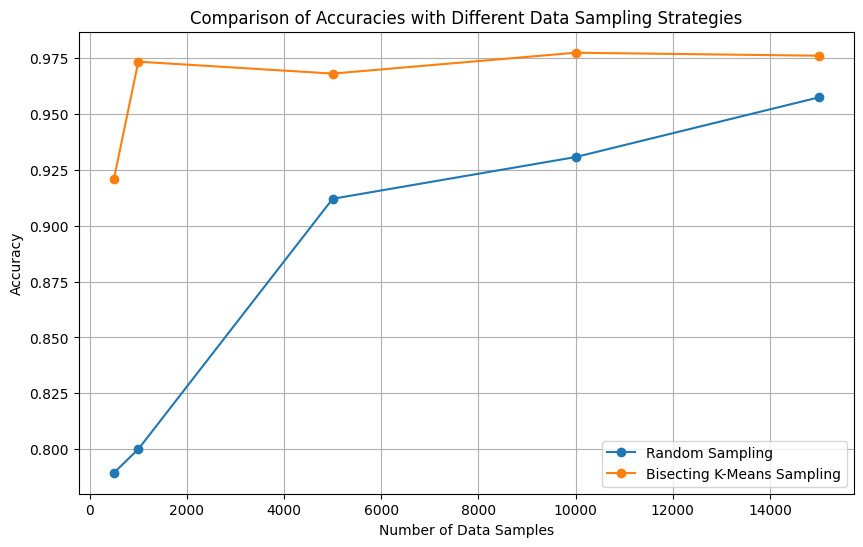

In [28]:

# Assuming you have two lists: data_samples and accuracies
data_samples = [row[0] for row in l_bkm]
accuracies_random = [row[1] for row in l_random]
accuracies_bisecting_means = [row[1] for row in l_bkm]

print(data_samples)
print(accuracies_random)
print(accuracies_bisecting_means)


# Plotting the graph
plt.figure(figsize=(10, 6))

plt.plot(data_samples, accuracies_random, label='Random Sampling', marker='o')
plt.plot(data_samples, accuracies_bisecting_means, label='Bisecting K-Means Sampling', marker='o')

plt.title('Comparison of Accuracies with Different Data Sampling Strategies')
plt.xlabel('Number of Data Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
